In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
train_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Cats and Dogs\train\train"
valid_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Cats and Dogs\train\valid"
test_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Cats and Dogs\train\test"


In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [9]:
x = mobile.layers[-6].output

In [10]:
output = Dense(units=2, activation='softmax')(x)

In [12]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [13]:
mobile.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [14]:
for layer in model.layers[:-5]:
    layer.trainable = False

<h1>Training The Model</h1>


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 151s - loss: 0.2092 - accuracy: 0.9040 - val_loss: 2.8512 - val_accuracy: 0.5000
Epoch 2/10
100/100 - 138s - loss: 0.0540 - accuracy: 0.9860 - val_loss: 1.6065 - val_accuracy: 0.5350
Epoch 3/10
100/100 - 152s - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.8993 - val_accuracy: 0.5350
Epoch 4/10
100/100 - 150s - loss: 0.0140 - accuracy: 1.0000 - val_loss: 2.0062 - val_accuracy: 0.5350
Epoch 5/10
100/100 - 159s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.9491 - val_accuracy: 0.5350
Epoch 6/10
100/100 - 146s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 2.1712 - val_accuracy: 0.5350
Epoch 7/10
100/100 - 154s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.0747 - val_accuracy: 0.5350
Epoch 8/10
100/100 - 148s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.2317 - val_accuracy: 0.5350
Epoch 9/10
100/100 - 147s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.2035 - val_accura

In [17]:
test_labels = test_batches.classes

In [18]:
predictions = model.predict(x=test_batches, verbose=0)

In [19]:
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))


In [21]:
cm_plot_labels = ['cat','dog']

Confusion matrix, without normalization
[[50  0]
 [48  2]]


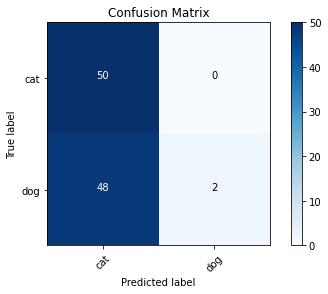

In [22]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')